In [1]:
import os
import sys
sys.path.append(os.path.join('..', '..', 'Quora_QP'))
import numpy as np

In [2]:
%matplotlib inline
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

/System/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [3]:
from preprocess.file_utils import deserialize, serialize
from itertools import chain
from preprocess.data_helpers import vectorize_sent

In [4]:
data_dir = os.path.join('..', 'dataset')

In [5]:
train_x, train_y = deserialize(os.path.join(data_dir, 'train.bin'))
dev_x, dev_y = deserialize(os.path.join(data_dir, 'dev.bin'))
test_x = deserialize(os.path.join(data_dir, 'test.bin'))

loading 2 lines from ../dataset/train.bin
loading 2 lines from ../dataset/dev.bin
loading 2345796 lines from ../dataset/test.bin


In [6]:
lens = np.array([[len(x[0]), len(x[1])] for x in test_x])

In [7]:
lens = np.reshape(lens,newshape=[lens.shape[0] * lens.shape[1]])

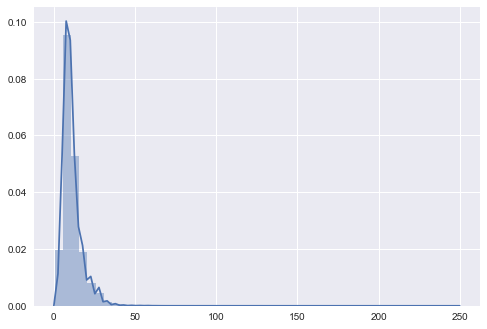

In [8]:
sns.distplot(lens)

In [9]:
word_train_set = set(chain.from_iterable(chain.from_iterable(train_x)))
word_dev_set = set(chain.from_iterable(chain.from_iterable(dev_x)))
word_test_set = set(chain.from_iterable(chain.from_iterable(test_x)))

In [10]:
word_set = word_train_set | word_dev_set | word_test_set

In [11]:
len(word_set)

141870

In [12]:
def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        pass

    try:
        import unicodedata
        unicodedata.numeric(s)
        return True
    except (TypeError, ValueError):
        pass

    return False

In [13]:
word_embed_dict = {}
cnt = 0
unks = []
with open(os.path.join(data_dir,'glove.840B.300d.txt'), 'r', encoding='utf-8') as f:
    for line in f:
        cnt += 1
        if cnt % 100000 == 0:
            print(cnt)
        glove_list = line.strip().split()
        word = glove_list[0]
        if word not in word_set:
            continue
        flag = True
        for x in glove_list[1:]:
            if not is_number(x):
                flag = False
                # print(word)
                break
        if not flag:
            unks.append(word)
            continue
        vec = [float(x) for x in glove_list[1:]]
        word_embed_dict[word] = vec

100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
1800000
1900000
2000000
2100000


In [14]:
len(word_embed_dict)

95030

In [15]:
len(word_set - word_embed_dict.keys())

46840

In [16]:
_PAD = '_PAD'
_NULL = '_NULL'
EMBEDDING_SIZE = 300
OOV_EMBED_SIZE = 5000


index2word = [_PAD, _NULL] + list(word_embed_dict.keys())
word2index = dict([(y, x) for (x, y) in enumerate(index2word)])
word_embeddings = [[0.0] * EMBEDDING_SIZE, [0.0] * EMBEDDING_SIZE]
for _, word in enumerate(index2word[2:]):
    word_embeddings.append(word_embed_dict[word])
for _ in range(OOV_EMBED_SIZE):
    word_embeddings.append(np.random.uniform(low=-0.1, high=0.1, size=[EMBEDDING_SIZE]).tolist())

In [17]:
serialize(word2index, os.path.join(data_dir, 'word2index_glove.bin'))
serialize(word_embeddings, os.path.join(data_dir, 'word_embeddings_glove.bin'))

saving 95032 lines to ../dataset/word2index_glove.bin
saving 100032 lines to ../dataset/word_embeddings_glove.bin
